In [1]:
%cd
%cd roadVUNet
!ls

/home/jovyan
/home/jovyan/roadVUNet
 Data.md     roads	 setup.py      VUNet.egg-info
 README.md   roads_old	 Training.md  'VUNet in action.ipynb'
 resources   roads.zip	 VUNet


In [8]:
# Install dependencies
# May need to restart the kernel after running this
# Must change np.float to np.float64 in edflow package (edflow/hooks/checkpoint_hooks/common.py)

!pip install -e .

Obtaining file:///home/jovyan/roadVUNet
  Preparing metadata (setup.py) ... done
  Attempting uninstall: VUNet
    Found existing installation: VUNet 0.1.0
    Uninstalling VUNet-0.1.0:
      Successfully uninstalled VUNet-0.1.0
  Running setup.py develop for VUNet


In [5]:
# This cell will start training
# Change paramaters in base.yaml

%cd VUNet/configs

!edflow -n test_vunet -b base.yaml prjoti.yaml -t

[INFO] [run]: /opt/conda/bin/edflow -n test_vunet -b base.yaml prjoti.yaml -t
[INFO] [run]: root: logs/2024-03-09T09-36-51_test_vunet
[INFO] [run]: hostname: jupyter-asriram5-40ucsc-2eedu
/bin/sh: 1: tmux: not found
[INFO] [run]: tmux: 
[INFO] [run]: pid: 2493
[INFO] [run]: pgid: 2493
[INFO] [run]: Project structure:
logs/2024-03-09T09-36-51_test_vunet
├╴code
├╴train
  ├╴checkpoints
├╴eval
├╴configs

[INFO] [main]: Training config:
batch_size: 10
code_root: null
data_root: ../../../roadVUNet/roads
datasets:
  train: VUNet.data.prjoti.Prjoti_VUNet_train
  validation: VUNet.data.prjoti.Prjoti_VUNet_val
integrations:
  tensorboardX:
    active: false
  wandb:
    active: false
iterator: VUNet.iterator.Iterator
losses:
  KL:
    end_ramp_it: 3500
    end_ramp_val: 1
    start_ramp_it: 2000
    start_ramp_val: 0
  color_L1:
    weight: 0.5
  color_L2:
    weight: 0.5
  color_gradient:
    weight: 0.0
  perceptual:
    vgg_feat_weights:
    - 1
    - 1
    - 1
    - 1
    - 1
    - 1
    wei

In [6]:
%cd
%cd roadVUNet

/home/jovyan
/home/jovyan/roadVUNet


In [7]:
from VUNet.model.vunet import VUnet
from VUNet.data.prjoti import Prjoti_VUNet

from edflow.util import edprint

import torch

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import yaml

In [8]:
# Load model

with open('VUNet/configs/base.yaml', 'r') as m_cfg:
    model_config = yaml.safe_load(m_cfg.read())

model = VUnet(model_config)
model = model.to('cuda')

In [9]:
# Load data

with open('VUNet/configs/prjoti_dset.yaml', 'r') as d_cfg:
    data_config = yaml.safe_load(d_cfg.read())

dset = Prjoti_VUNet(data_config)
dset.expand = True

/home/jovyan/roadVUNet


|         Name |      Type |         Content |
|--------------|-----------|-----------------|
|     stickman |   ndarray |   (256, 256, 1) |
|   appearance |   ndarray |   (256, 256, 3) |
|       target |   ndarray |   (256, 256, 3) |
|       index_ |       int |               3 |


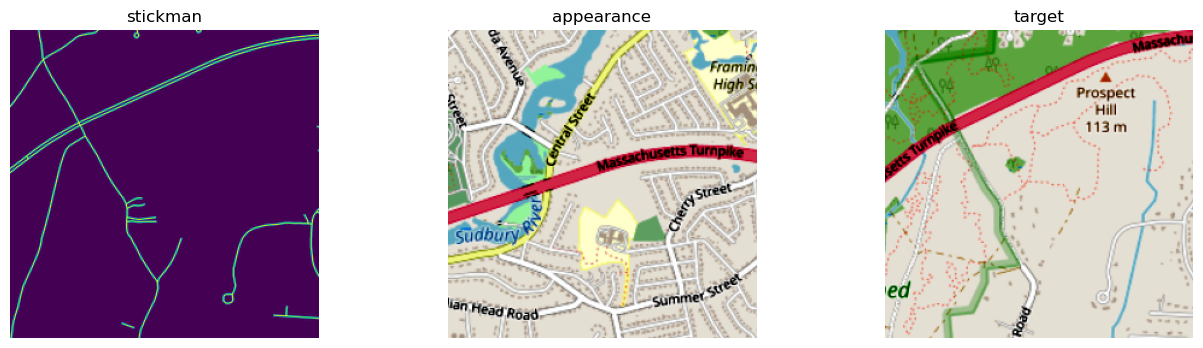

In [10]:
# Try changing index
ex=dset[3]
edprint(ex)

f, [ax1, ax2, ax3] = _, AX = plt.subplots(1, 3, figsize=(16, 4))

ax1.imshow(ex['stickman'])
ax1.set_title('stickman')
ax2.imshow(ex['appearance'])
ax2.set_title('appearance')
ax3.imshow(ex['target'])
ax3.set_title('target')

for ax in AX:
    ax.axis('off')

In [21]:
# Change checkpoint_path as needed
# Checkpoints automatically saved in similar path as below
checkpoint_path = 'VUNet/configs/logs/2024-03-09T09-36-51_test_vunet/train/checkpoints/model-24.ckpt'

full_state = torch.load(checkpoint_path, map_location=torch.device('cuda'))
model_state = full_state['model']  # we also store the optimize state, which we do not need here

model.load_state_dict(model_state)

<All keys matched successfully>

In [12]:
from VUNet.iterator import np2pt, pt2np

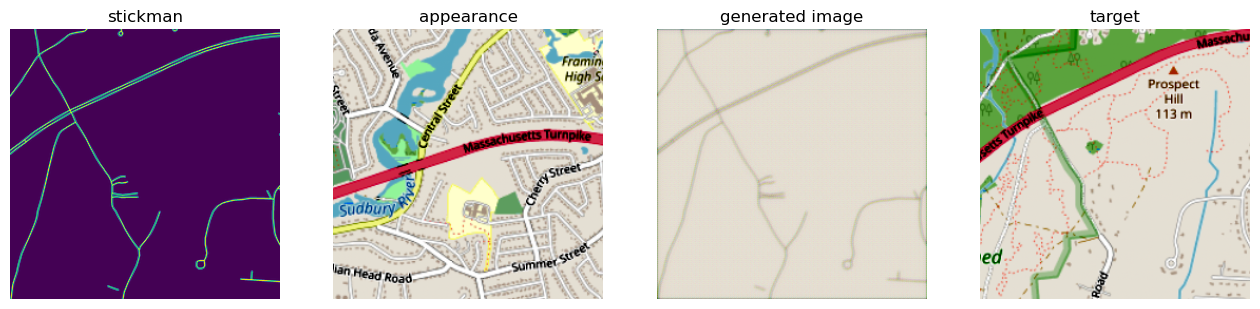

In [22]:
ex = dset[3]  # Change the index!

# Data preparation
stick = np2pt(ex['stickman'][None])  # Simulate batch dimension using np_arr[None]
app = np2pt(ex['appearance'][None])
target = np2pt(ex['target'][None])

# VUNet finally and actually in action! 🚀
out_image = model({'pose': stick, 'appearance': app})

# Back to numpy
out_image = pt2np(out_image)[0]  # remove batch dimension using arr[0]

# Let's see what we got
f, [ax1, ax2, ax3, ax4] = _, AX = plt.subplots(1, 4, figsize=(16, 4))

ax1.imshow(ex['stickman'])
ax1.set_title('stickman')
ax2.imshow(ex['appearance'])
ax2.set_title('appearance')
ax3.imshow(out_image)
ax3.set_title('generated image')
ax4.imshow(ex['target'])
ax4.set_title('target')

for ax in AX:
    ax.axis('off')